In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.autograd as autograd
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw

from src.region_proposal import RegionProposalNetwork
from src.smooth_l1_loss import SmoothL1LossFunc
from src.generate_anchors import generate_anchors
from src.generate_anchor_data import AnchorDataGenerator

In [2]:
image = Image.open("data/JPEGImages/2010_005018.jpg")
image_a = np.asarray(image).astype(np.float32).transpose(2, 0, 1)
image_a = image_a[np.newaxis, :]
input = autograd.Variable(torch.Tensor(image_a))
im_w, im_h = autograd.Variable(torch.Tensor([image_a.shape[3]])), autograd.Variable(torch.Tensor([image_a.shape[2]]))

In [3]:
gt_df = pd.read_csv("data/Preprocess/Annotations/2010_005018.jpg.csv")
gt = gt_df.as_matrix()
gt_boxes = gt[:, 0:4]
gt_boxes = autograd.Variable(torch.Tensor(gt_boxes))

In [4]:
rpn = RegionProposalNetwork()
anchor_generator = AnchorDataGenerator()

In [5]:
obj_scores, regressions = rpn(input)

In [6]:
anchors, labels, bbox_target, bbox_weights = anchor_generator(obj_scores, gt_boxes, im_w, im_h)
anchors = anchors.data.numpy()
labels = labels.data.numpy()
bbox_target = bbox_target.data.numpy()
bbox_weights = bbox_weights.data.numpy()

143


In [7]:
image_draw = ImageDraw.Draw(image)

In [8]:
for i in range(gt_boxes.size(0)):
    image_draw.rectangle(gt_boxes.data.numpy()[i, :].tolist(), outline="white")

In [9]:
_labels = labels.reshape(1, 9, obj_scores.size(2), obj_scores.size(3)).transpose(0, 2, 3, 1).ravel()
fg_anchors = anchors[_labels == 1.0, :]
bg_anchors = anchors[_labels == 0.0, :]

for i in range(fg_anchors.shape[0]):
       image_draw.rectangle(fg_anchors[i, :].tolist(), outline="blue")

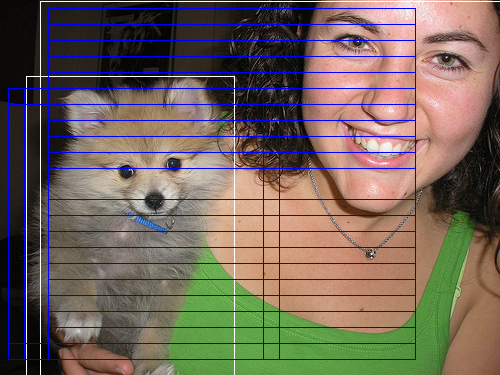

In [11]:
image

In [28]:
bbox_weights.transpose(0, 2, 3, 1).reshape(obj_scores.size(2)*obj_scores.size(3)*9, 4)[_labels != 1.0, :].sum()

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]], dtype=float32)